In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def moving_avarage_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t-1] = np.mean(X[:t+1])
		else:
			S[t-1] = np.sum(X[t-k:t])/k
	return S

def exponential_smoothing(X,α):
	S = np.zeros(X.shape[0])
	S[0] = X[0]
	for t in range(1,X.shape[0]):
		S[t] = α * X[t-1] + (1- α) * S[t-1]
	return S

def double_exponential_smoothing(X,α,β):
	S,A,B = (np.zeros( X.shape[0] ) for i in range(3))
	S[0] = X[0]
	for t in range(1,X.shape[0]):
		A[t] = α * X[t] + (1- α) * S[t-1]
		B[t] = β * (A[t] - A[t-1]) + (1 - β) * B[t-1]
		S[t] = A[t] + B[t]
	return S

def triple_exponential_smoothing(X,L,α,β,γ,ϕ):

	def sig_ϕ(ϕ,m):
		return np.sum(np.array([np.power(ϕ,i) for i in range(m+1)]))

	C, S, B, F = (np.zeros( X.shape[0] ) for i in range(4))
	S[0], F[0] = X[0], X[0]
	B[0] = np.mean( X[L:2*L] - X[:L] ) / L
	m = 12
	sig_ϕ = sig_ϕ(ϕ,m)
	for t in range(1, X.shape[0]):
		S[t] = α * (X[t] - C[t % L]) + (1 - α) * (S[t-1] + ϕ * B[t-1])
		B[t] = β * (S[t] - S[t-1]) + (1-β) * ϕ * B[t-1]
		C[t % L] = γ * (X[t] - S[t]) + (1 - γ) * C[t % L]
		F[t] = S[t] + sig_ϕ * B[t] + C[t % L]
	return S



In [10]:
#dataset loading
AAPL = pd.read_csv(r"C:\Users\s_alizadehnia\Desktop\LSTMPredictions\Extended\513_data_test1\Real_NEDC_testroom.csv")

#smoothing techiniques
time_series = np.array(AAPL['Vehicle_Speed'])
m_a_s = moving_avarage_smoothing(time_series,12)
e_s = exponential_smoothing(time_series,0.3)
d_e_s = double_exponential_smoothing(time_series,0.5,0.1)
t_e_s = triple_exponential_smoothing(time_series,12,0.1,0.1,0.1,0.5)



In [7]:
m_a_s.shape

(1184,)

In [8]:
np.array(AAPL['Vehicle_Speed']).shape

(1184,)

In [13]:
result = np.where(np.array(AAPL['Vehicle_Speed']) == 0, 0, m_a_s)

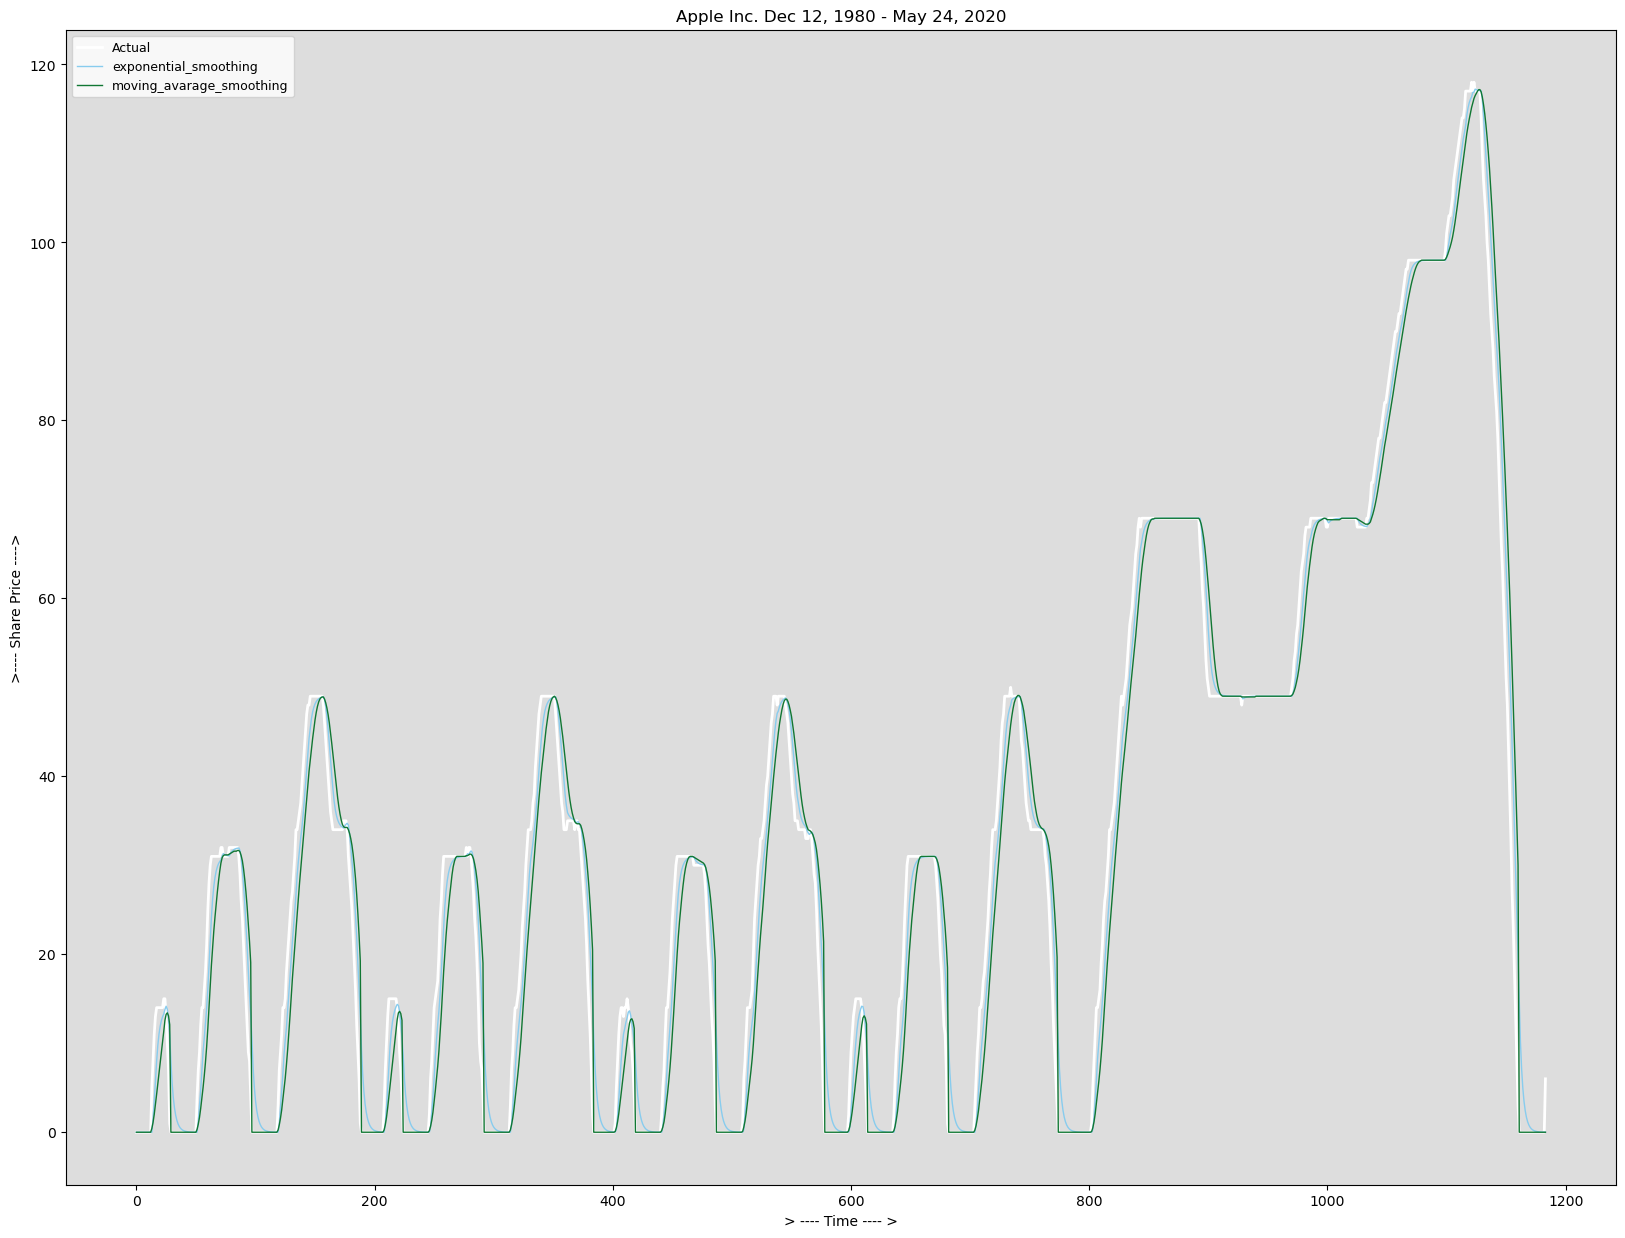

In [17]:
#data plots
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)
ax = plt.gca()
ax.set_facecolor('#dddddd')

plt.title('Apple Inc. Dec 12, 1980 - May 24, 2020')
plt.xlabel("> ---- Time ---- >")
plt.ylabel(">---- Share Price ---->")

plt.plot(time_series,linewidth = 2,label="Actual",color='white')
plt.plot(e_s,linewidth=1,label="exponential_smoothing",color="#88CCEE")
plt.plot(result,linewidth=1,label="moving_avarage_smoothing",color="#117733")
# plt.plot(d_e_s,linewidth=1,label="double_exponential_smoothing",color="#117733")
# plt.plot(t_e_s,linewidth=1,label="triple_exponential_smoothing",color="red")

plt.legend(fontsize=9)
plt.show()

In [20]:
AAPL

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Electrical_load,Switch,Fuel_level,...,RON_factor,altitude,latitude,longitude,satelites,bearing,angular_speed,DTC,slope,smooth_speed
0,51580,12/7/2024 12:22,12/7/2024 12:22,2,90,True,10.6,1,32,61.702,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
1,52580,12/7/2024 12:22,12/7/2024 12:22,2,90,True,13.8,1,32,61.728,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
2,53580,12/7/2024 12:22,12/7/2024 12:22,2,90,True,13.8,1,32,61.751,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
3,54580,12/7/2024 12:22,12/7/2024 12:22,2,90,True,13.9,1,32,61.772,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
4,55580,12/7/2024 12:22,12/7/2024 12:22,2,90,True,13.9,1,32,61.791,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1230572,12/7/2024 12:42,12/7/2024 12:42,2,87,True,13.8,1,32,61.344,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
1180,1231572,12/7/2024 12:42,12/7/2024 12:42,2,87,True,13.8,1,32,61.406,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
1181,1232572,12/7/2024 12:42,12/7/2024 12:42,2,87,True,13.7,1,32,61.461,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0
1182,1233572,12/7/2024 12:42,12/7/2024 12:42,2,87,True,13.8,1,32,61.511,...,0.252,0,0,0,0,244.91,0,NaN,0,0.0


In [19]:
AAPL['smooth_speed'] = result

In [22]:
AAPL.to_csv(r'C:\Users\s_alizadehnia\Desktop\LSTMPredictions\Extended\513_data_test1\nedc_smooth_speed.csv')

In [12]:
import numpy as np

# Example arrays
array1 = np.array([0, 2, 0, 4, 0])
array2 = np.array([5, 6, 7, 8, 9])

# Result array
result = np.where(array1 == 0, 0, array2)

print("Array1:", array1)
print("Array2:", array2)
print("Result:", result)

Array1: [0 2 0 4 0]
Array2: [5 6 7 8 9]
Result: [0 6 0 8 0]
